In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../ising_times_new.csv")

In [2]:
df

,grid_size,total_flips,nproc,time_sec,iters,type
0,200,10000,1,0.3979,1,baseline
1,200,10000,2,0.4340,100,partition
2,200,10000,2,0.4600,100,random
3,200,10000,3,0.4400,100,partition
4,200,10000,3,0.4730,100,random
...,...,...,...,...,...,...
179,500,100000,10,27.7510,1000,random
180,500,100000,11,3.3620,1000,partition
181,500,100000,11,24.3690,1000,random
182,500,100000,12,3.6140,1000,partition


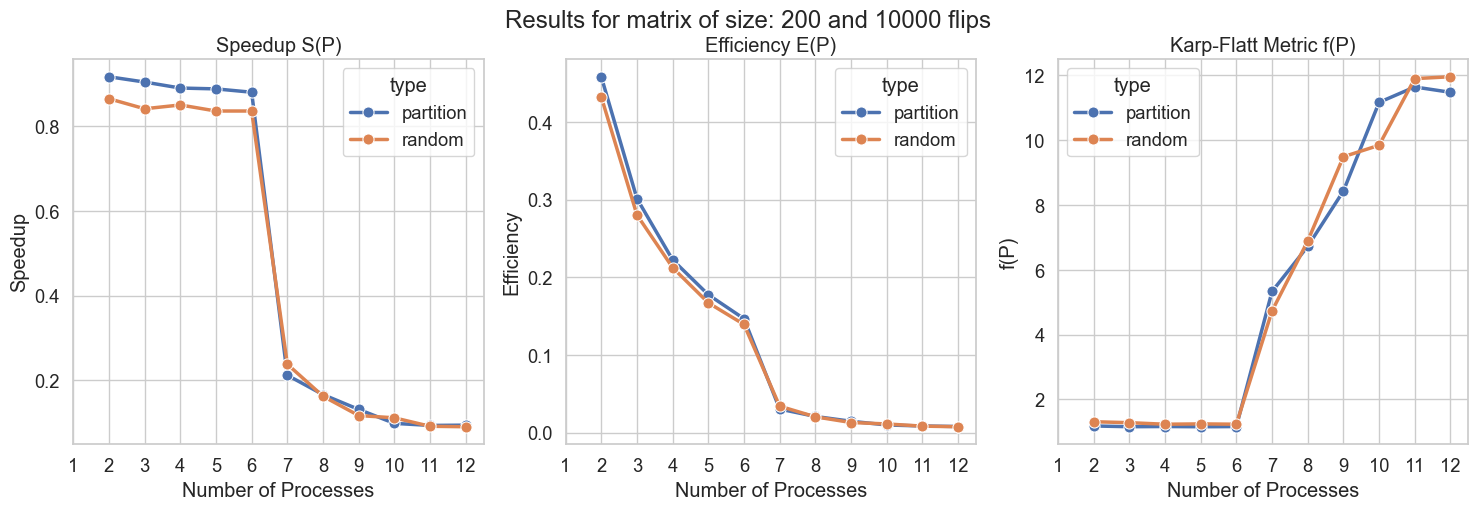

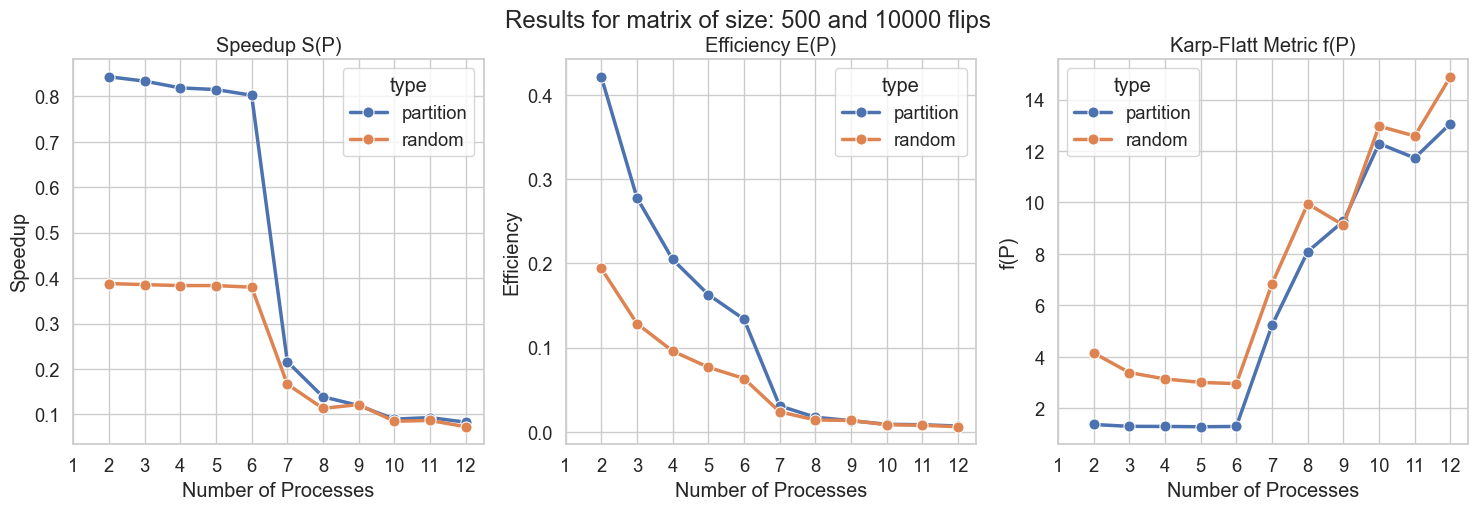

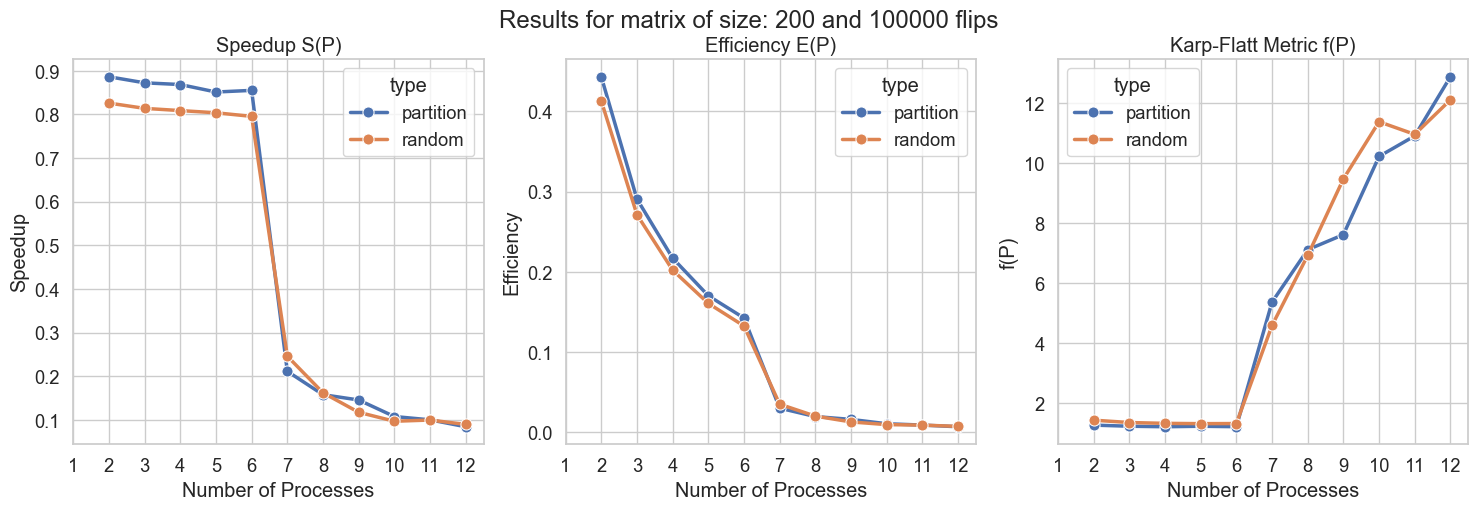

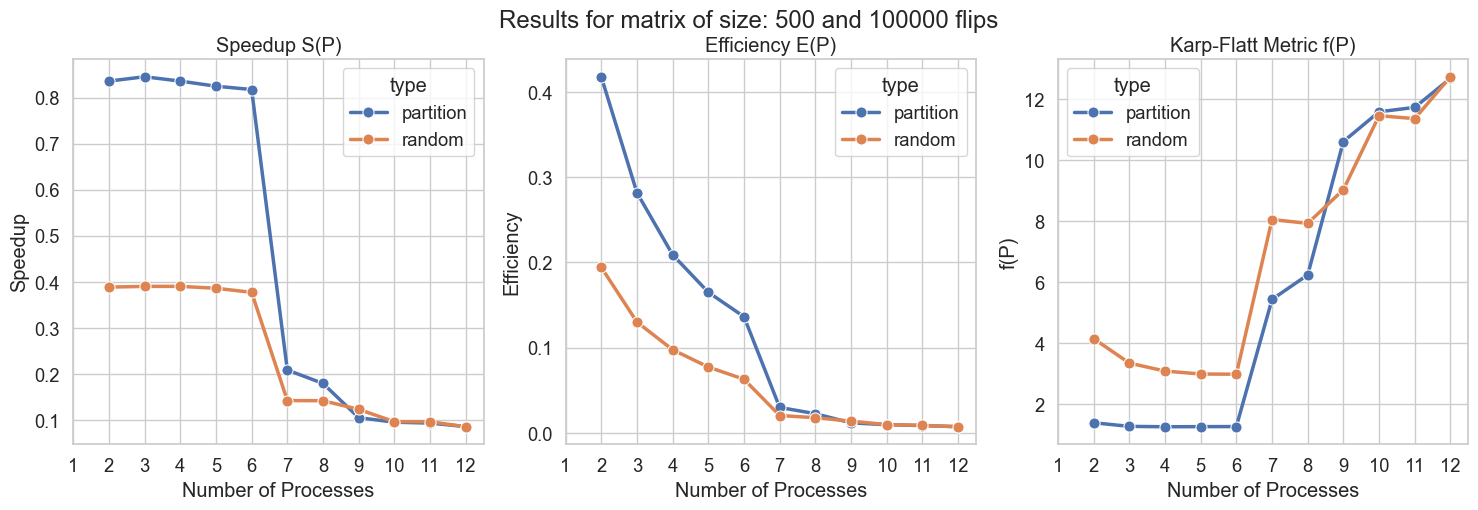

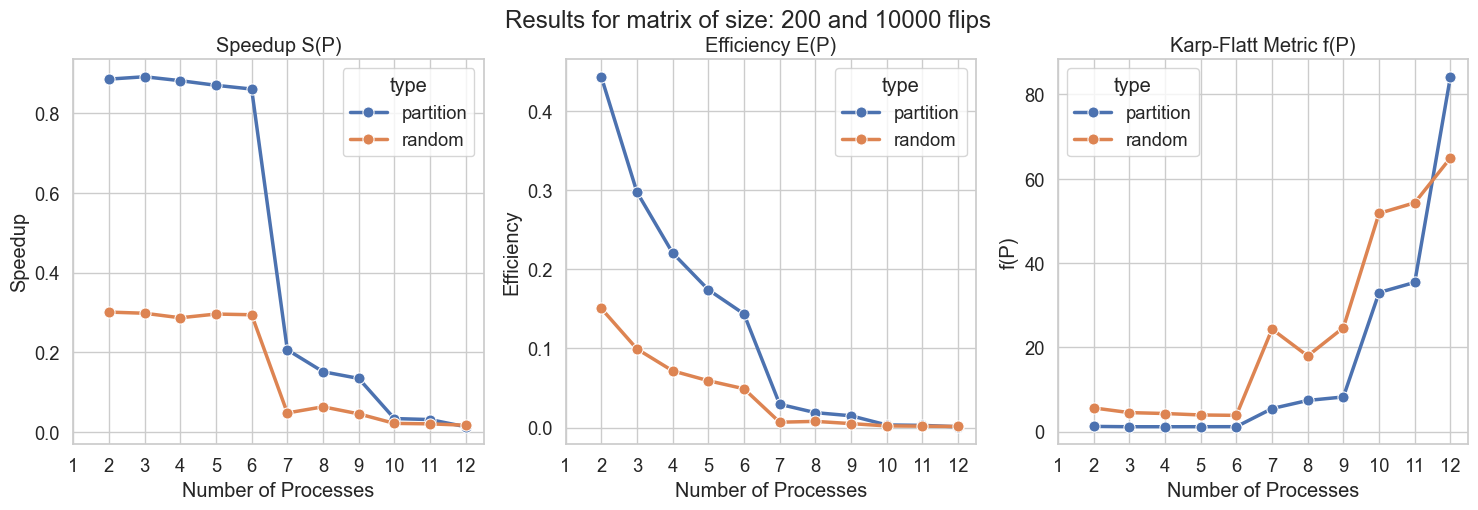

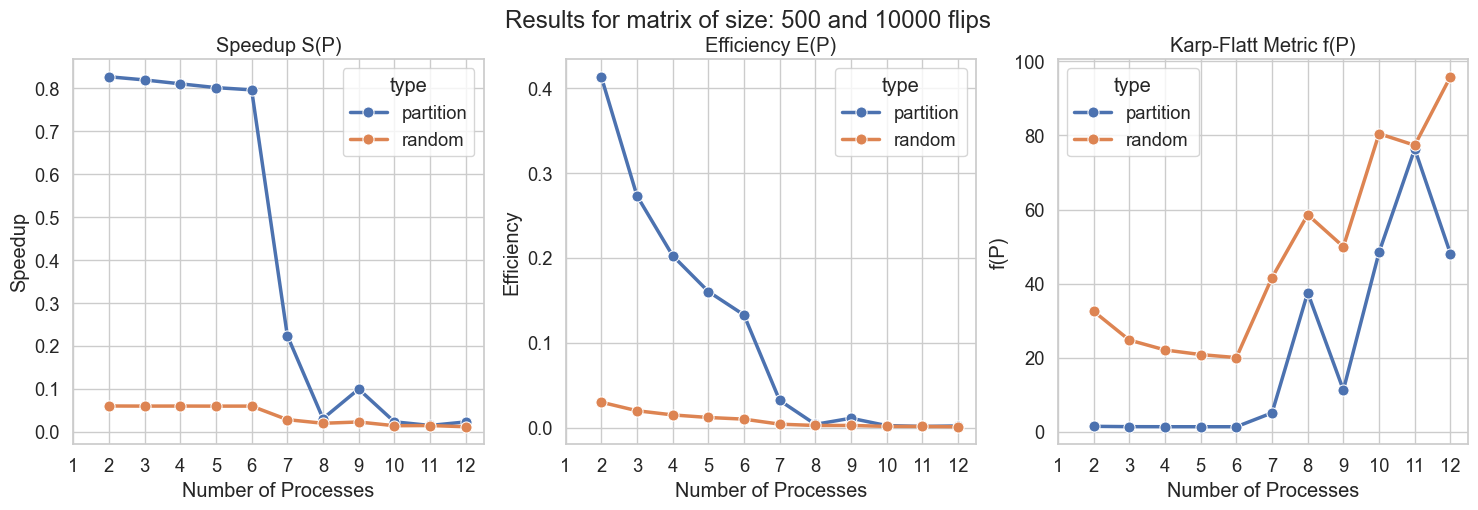

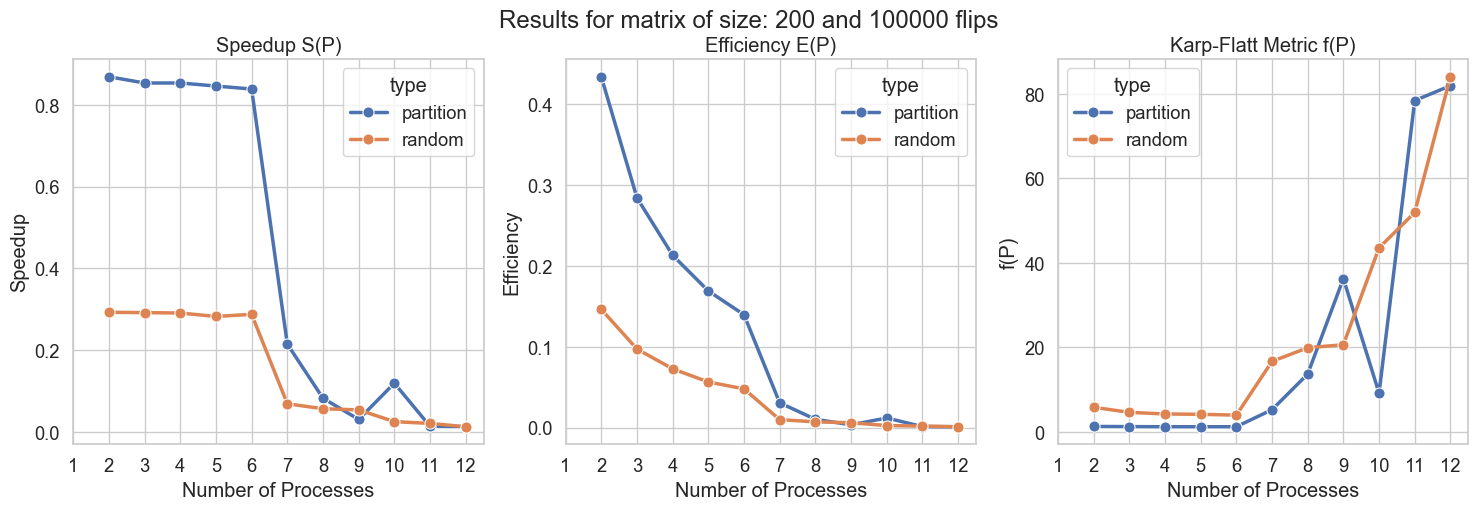

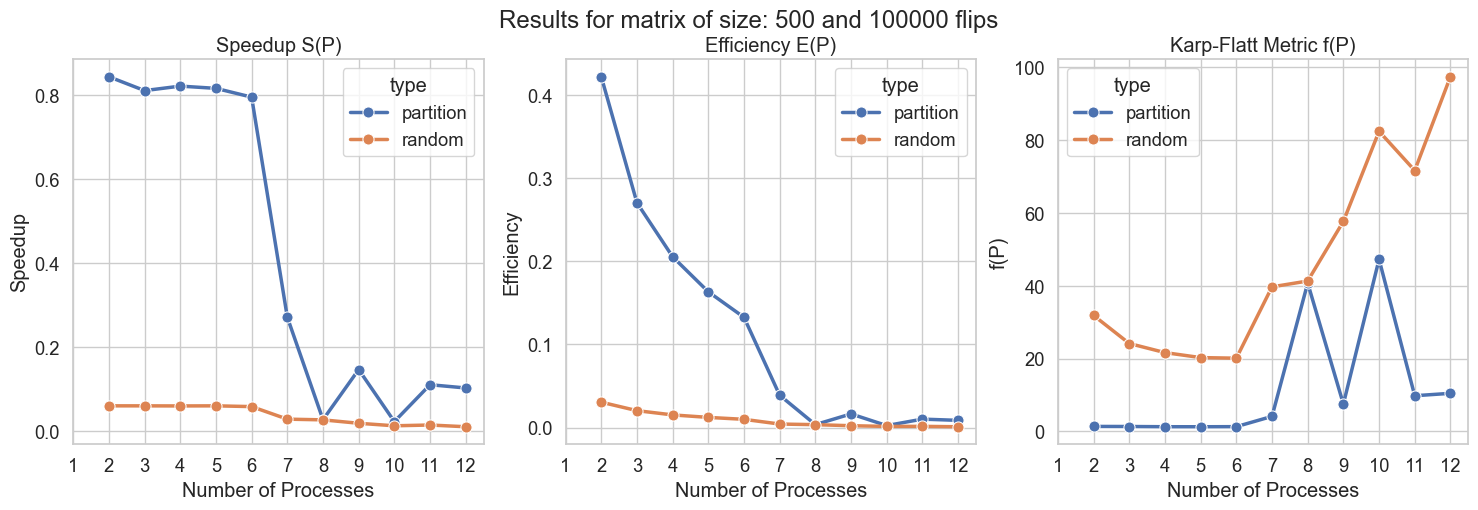

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../ising_times_new.csv")

def plot_line(rest: pd.DataFrame, y: str, y_label: str, title: str, ax):

    sns.lineplot(
        data=rest, x="nproc", y=y,
        marker="o", linewidth=2.5, markersize=8, ax=ax, hue='type'
    )
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel("Number of Processes")
    ax.set_xticks(df["nproc"].unique())


grid_sizes = [200, 500]
total_flips = [10000, 100000]
for iters in [100, 1000]:
    for flip_count in total_flips:
        for grid_size in grid_sizes:
            per_proc_time = df[(df["grid_size"] == grid_size) & (df["total_flips"] == flip_count) & ((df["iters"] == iters) | (df["iters"] == 1))]

            one_proc = per_proc_time["nproc"] == 1
            base_time = per_proc_time[one_proc]["time_sec"].iloc[0].item()

            rest = per_proc_time[~one_proc].copy()
            rest["SP"] = base_time / rest["time_sec"]
            rest["EP"] = rest["SP"] / rest["nproc"]
            rest["fp"] = (1/rest["SP"] - (1/rest["nproc"])) / (1 - (1/rest["nproc"]))

            sns.set_theme(style="whitegrid", font_scale=1.2)
            fig, axes = plt.subplots(1, 3, figsize=(18,5))

            fig.suptitle(f"Results for matrix of size: {grid_size} and {flip_count} flips")
            plot_line(rest, "SP", "Speedup", "Speedup S(P)", axes[0])
            plot_line(rest, "EP", "Efficiency", "Efficiency E(P)", axes[1])
            plot_line(rest, "fp", "f(P)", "Karp-Flatt Metric f(P)", axes[2])

            plt.show()